In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import pandas as pd
import scipy

## Question 1

### 1.1 . Getting and visualizing the dataset

In [2]:
wine = load_wine()

In [3]:
data = wine.data
X = data[:,1:]
y = data[:,0]
print(X.shape,y.shape)

(178, 12) (178,)


In [4]:
cols = np.concatenate((X,y.reshape(-1,1)),axis = 1)
dataf = pd.DataFrame(cols,columns = wine.feature_names[1:]+[wine.feature_names[0]])
dataf

malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0          1.71  2.43               15.6      127.0           2.80   
1          1.78  2.14               11.2      100.0           2.65   
2          2.36  2.67               18.6      101.0           2.80   
3          1.95  2.50               16.8      113.0           3.85   
4          2.59  2.87               21.0      118.0           2.80   
..          ...   ...                ...        ...            ...   
173        5.65  2.45               20.5       95.0           1.68   
174        3.91  2.48               23.0      102.0           1.80   
175        4.28  2.26               20.0      120.0           1.59   
176        2.59  2.37               20.0      120.0           1.65   
177        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  alcohol  
0                            3.92   1065.0    14.23  
1                            3.40   1050.0    13.20  
2                            3.17   1185.0    13.16  
3                            3.45   1480.0    14.37  
4                            2.93    735.0    13.24  
..                            ...      ...      ...  
173                          1.74    740.0    13.71  
174                          1.56    750.0    13.40  
175                          1.56    835.0    13.27  
176                          1.62    840.0    13.17  
177                          1.60    560.0    14.13  

[178 rows x 13 columns]

### 1.2. Plotting the scatterplot of alcohol vs other features

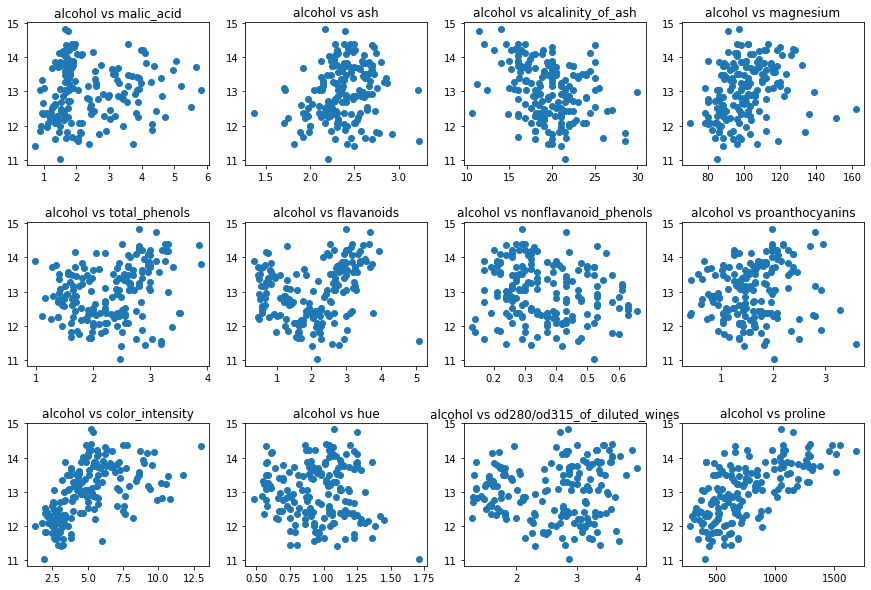

In [5]:
fig = plt.figure(figsize=(15,10))
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax.scatter(X[:,i],y)
    ax.set_title(wine.feature_names[0]+' vs '+wine.feature_names[i+1],size = 12)

plt.subplots_adjust(hspace = 0.4,wspace = 0.2)
plt.show()

### 1.3. Explain your insights looking at the scatterplot in part 2

Proline and color intensity seem to be the most helpful in determining the alcohol value due to an obvious positive correlation. Least helpful can be anyone with little to no correlation (for example nonflavanoid phenols where the data is pretty much scattered)

### 1.4  In your opinion, what information, the following observations will give regarding the alcohol content (increase or decrease). You can use any method of your choice to make this decision. Make sure to explain your reasoning

1. **Increased value of Color intensity**

Alcohol content will increase with increase in color intensity as according to the scatter plots above, alcohol has a positive correlation with proline, i.e. when proline increases, alcohol increases. Although please note that this observation doesnt imply causation. Hence, increase in color intensity is not necessarily a reason for increase in alcohol

2. **Reduced value of proline**

Reduction in proline will reduce alcohol because of the positive correlation again.

3. **Increased magnesium but reduced Ash value**

We will fit a linear model with just these 2 features and look at their weights to determine which feature out of magnesium and Ash will dominate the behavior of alcohol

In [6]:
xx = np.concatenate((X[:,1].reshape(-1,1),X[:,3].reshape(-1,1)),axis = 1)
beta = np.linalg.inv(xx.T.dot(xx)).dot(xx.T.dot(y))
print(f'Correlation of Ash: {beta[0]}')
print(f'Correlation of Magnesium: {beta[1]}')

Correlation of Ash: 3.311436804196802
Correlation of Magnesium: 0.050683023740599964


Since jointly analyzed, Ash seems to have a higher weightage hence alcohol will decrease with decrease in Ash value.

## Question 2: Regression

### 2.1 Assuming we choose proline as our single independent variable and use it to predict the alcohol value


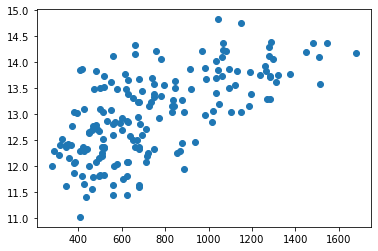

In [7]:
proline = X[:,-1]
alcohol = y
plt.scatter(proline,alcohol);

In [8]:
## Fitting the model y = beta0 + beta1 proline
onee = np.ones([len(proline),1])
X = np.concatenate((onee,proline.reshape(-1,1)),axis = 1)
beta= np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

## predicting at the original proline locations
pred_proline = X.dot(beta)

## predictig at new x locations for plotting
xpred = np.linspace(300,1700,200)
onee = np.ones([200,1])
Xpred = np.concatenate((onee,xpred.reshape(200,1)),axis = 1)
pred_new = Xpred.dot(beta)

In [9]:
## plotting 

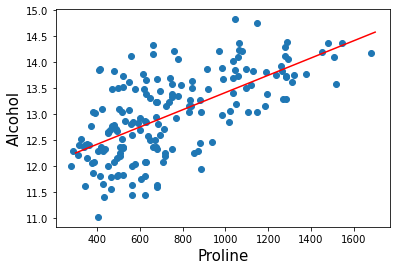

In [10]:
plt.scatter(proline,alcohol)
plt.plot(xpred,pred_new,color = 'r',label  = 'prediction')
plt.xlabel('Proline',size  = 15)
plt.ylabel('Alcohol', size =15)
plt.show()

In [11]:
def r2(y,ypred):
    nr = sum([(y[i] - ypred[i])**2 for i in range(len(y))])
    dr = sum([(y[i] - y.mean())**2 for i in range(len(y))])
    return 1 - (nr/dr)

In [12]:
print(f'R2 for the straight line model: {r2(y,pred_proline)}')

R2 for the straight line model: 0.4143754862647203


### 2.2 Plot multiple degree models

In [13]:
## constructing a general function for computing X matrix
def Xmat(x,p):
    # x: data
    # p: degree of polynomial 
    X = []
    for i in x:
        temp = [i**j for j in range(p+1)]
        X.append(temp)
    return np.array(X)

In [14]:
## degree 1
X1 = Xmat(proline,p = 1)
beta1= np.linalg.inv(X1.T.dot(X1)).dot(X1.T.dot(alcohol))
pred1 = X1.dot(beta1)
r2_1 = np.round(r2(alcohol,pred1),3)

## degree 2
X2 = Xmat(proline,p = 2)
beta2= np.linalg.inv(X2.T.dot(X2)).dot(X2.T.dot(alcohol))
pred2 = X2.dot(beta2)
r2_2 = np.round(r2(alcohol,pred2),3)

## degree 3
X3 = Xmat(proline,p = 3)
beta3= np.linalg.inv(X3.T.dot(X3)).dot(X3.T.dot(alcohol))
pred3 = X3.dot(beta3)
r2_3 = np.round(r2(alcohol,pred3),3)

## degree 4
X4 = Xmat(proline,p = 4)
beta4= np.linalg.inv(X4.T.dot(X4)).dot(X4.T.dot(alcohol))
pred4 = X4.dot(beta4)
r2_4 = np.round(r2(alcohol,pred4),3)

## degree 5
X5 = Xmat(proline,p = 5)
beta5 = np.linalg.inv(X5.T.dot(X5)).dot(X5.T.dot(alcohol))
pred5 = X5.dot(beta5)
r2_5 = np.round(r2(alcohol,pred5),3)

In [15]:
## Plotting
Xpred1 = Xmat(xpred,p = 1)
pred_new1 = Xpred1.dot(beta1)
Xpred2 = Xmat(xpred,p = 2)
pred_new2 = Xpred2.dot(beta2)
Xpred3 = Xmat(xpred,p = 3)
pred_new3 = Xpred3.dot(beta3)
Xpred4 = Xmat(xpred,p = 4)
pred_new4 = Xpred4.dot(beta4)
Xpred5 = Xmat(xpred,p = 5)
pred_new5 = Xpred5.dot(beta5)



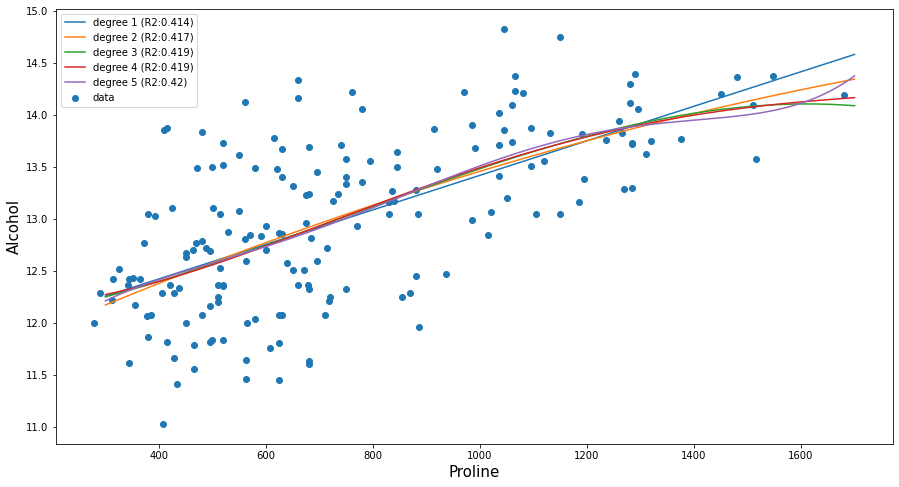

In [16]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.scatter(proline,alcohol, label = 'data')
plt.xlabel('Proline',size  = 15)
plt.ylabel('Alcohol', size =15)

plt.plot(xpred,pred_new1,label = f'degree 1 (R2:{r2_1})')
plt.plot(xpred,pred_new2,label = f'degree 2 (R2:{r2_2})')
plt.plot(xpred,pred_new3,label = f'degree 3 (R2:{r2_3})')
plt.plot(xpred,pred_new4,label = f'degree 4 (R2:{r2_4})')
plt.plot(xpred,pred_new5,label = f'degree 5 (R2:{r2_5})')
plt.legend()
plt.show()

### 3. Which is the best model

Based on the curve of the models, they look quite similar and the R2 value is also very close. Hence we can just choose the most simple model (the straight line). However if we strictly go based on R2, then degree 5 model is the best.

### 4. CI and PI on quadratic proline model

In [17]:
confidence = 0.95
## CI
e = alcohol - X2.dot(beta2)
var = np.linalg.norm(e)**2/(len(alcohol) - 3)
std = np.sqrt(var)
term1 = np.diag(Xpred2.dot(np.linalg.inv(X2.T.dot(X2))).dot(Xpred2.T))
term2 = np.sqrt(term1)
CI = std*term2*scipy.stats.t.ppf((1+confidence)/2.,len(alcohol)-3)

# PI
term1 = np.diag(np.eye(len(Xpred2)) + Xpred2.dot(np.linalg.inv(X2.T.dot(X2))).dot(Xpred2.T))
term2 = np.sqrt(term1)
PI = std*term2*scipy.stats.t.ppf((1+confidence)/2.,len(alcohol)-3)

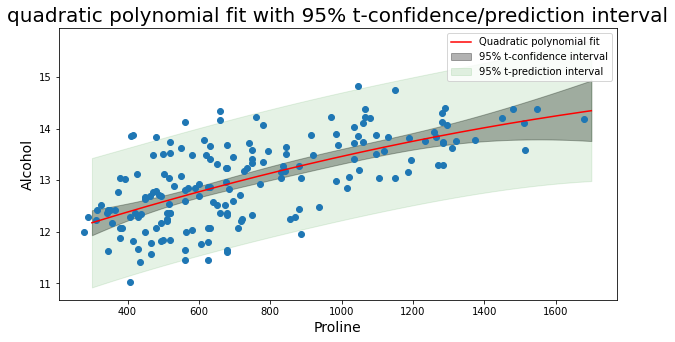

In [18]:
## plotting confidence interval
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(xpred,pred_new2,color = 'r', label = 'Quadratic polynomial fit')
ax.fill_between(xpred,pred_new2-CI, pred_new2+CI,alpha = 0.3,color = 'k', label = '95% t-confidence interval')
ax.fill_between(xpred,pred_new2-PI, pred_new2+PI,alpha = 0.1,color = 'g', label = '95% t-prediction interval')
ax.scatter(proline,alcohol)
ax.set_title('quadratic polynomial fit with 95% t-confidence/prediction interval',size= 20)
plt.legend()
plt.xlabel('Proline',size = 14)
plt.ylabel('Alcohol',size = 14)
plt.show()

Here the CI is contained in the PI because PI also considers the noise in the data directly besides considering the model uncertainty. 

### 5. t-confidence Interval for polynomial of degree 1 to 6

In [19]:
## degree 6
X6 = Xmat(proline,p = 6)
beta6 = np.linalg.inv(X6.T.dot(X6)).dot(X6.T.dot(alcohol))
pred6 = X6.dot(beta6)
Xpred6 = Xmat(xpred,p = 6)
pred_new6 = Xpred6.dot(beta6)

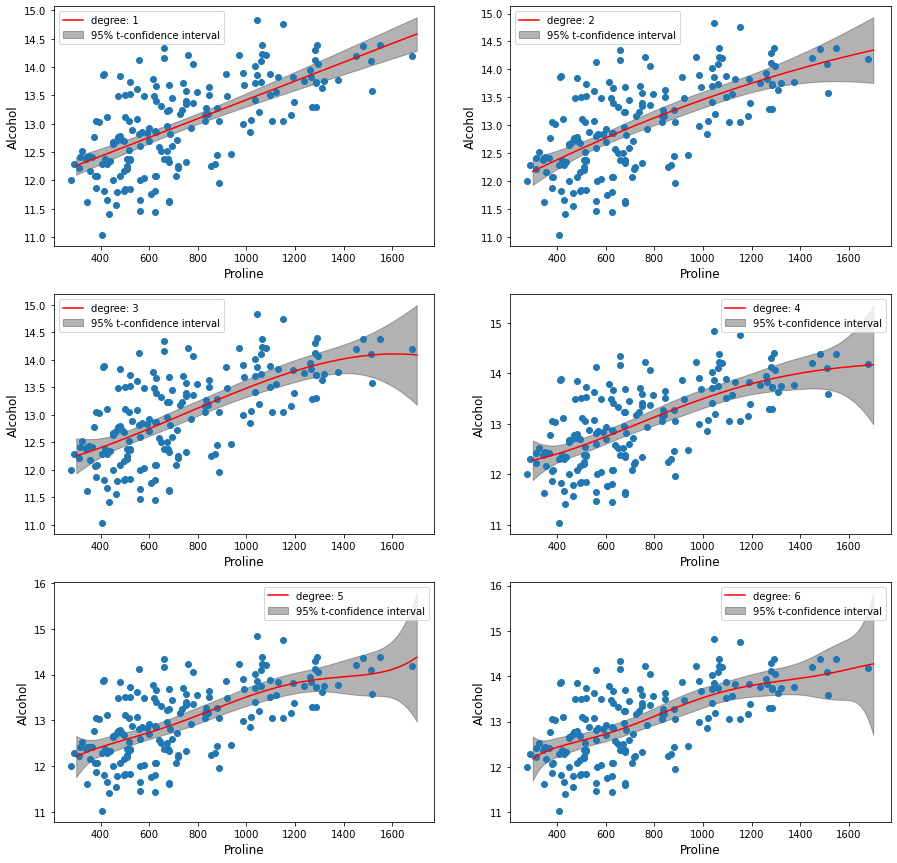

In [20]:
fig = plt.figure(figsize=(15,15))
pred = [pred_new1, pred_new2, pred_new3, pred_new4, pred_new5, pred_new6]
pred_data = [pred1, pred2, pred3, pred4, pred5, pred6]
Xpred = [Xpred1, Xpred2, Xpred3, Xpred4, Xpred5, Xpred6]
X = [X1, X2, X3, X4, X5, X6]
dof = [2,3,4,5,6,7]
for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    
    e = alcohol - pred_data[i]
    var = np.linalg.norm(e)**2/(len(alcohol) - dof[i])
    std = np.sqrt(var)
    term1 = np.diag(Xpred[i].dot(np.linalg.inv(X[i].T.dot(X[i]))).dot(Xpred[i].T))
    term2 = np.sqrt(term1)
    CI = std*term2*scipy.stats.t.ppf((1+confidence)/2.,len(alcohol)-dof[i])
    ax.plot(xpred,pred[i],color = 'r', label = f'degree: {i+1}')
    ax.fill_between(xpred,pred[i]-CI, pred[i]+CI,alpha = 0.3,color = 'k', label = '95% t-confidence interval')
    ax.scatter(proline,alcohol)
    
    plt.legend()
    plt.xlabel('Proline',size = 12)
    plt.ylabel('Alcohol',size = 12)
plt.show()

Confidence Interval is broadest for degree 5 and 6. It shows there is more uncertainly near the edges for these models. This is because in these higher degree models, there is more flexibility, however, there is not enough data to constrain all these parameters near the edges. This makes the confidence interval diverge out and become broad. Such broad intervals are also a good indication that these models are probably not suitable for prediction at the edges.